<a href="https://colab.research.google.com/github/chineidu/NLP-Tutorial/blob/main/notebook/03_tensorflow/03_classification_with_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification With TensorFlow

Types of Classification
1. Binary
2. Multiclass
3. Multilabel


In [1]:
# Standard imports
from typing import List, Tuple, Dict, Optional, Union
import itertools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

### Create Data For Classification

* Using scikit-learn

In [2]:
from sklearn.datasets import make_circles

RANDOM_STATE = 1
SEED = 2
NOISE = 0.05
N_SAMPLES = 2_000

X, y = make_circles(N_SAMPLES, noise=NOISE, random_state=RANDOM_STATE)

X.shape, y. shape

((2000, 2), (2000,))

In [3]:
# Preview the data
X[:4], y[:4]

(array([[-0.54830966, -0.90374793],
        [-0.287522  , -0.70272049],
        [-0.19083057,  0.83641477],
        [-0.29472923,  0.72388715]]), array([0, 1, 1, 1]))

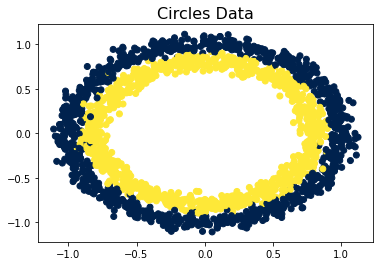

In [4]:
# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.cividis)
plt.title("Circles Data", size=16)
plt.show()

### Build A Classification Model (NN)

* using a single layer with 10 neurons.
* classification loss = **binary_crossentropy**
* classification metrics = **accuracy**
* Epochs = 50

In [5]:
# Build a model
tf.random.set_seed(SEED)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, input_shape=[X.shape[-1]])
])

# Compile
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit
history_1 = model_1.fit(X, y, epochs=50)

Epoch 1/50
63/63 [==============================] - 1s 4ms/step - loss: 4.2703 - accuracy: 0.1045
Epoch 2/50
63/63 [==============================] - 0s 3ms/step - loss: 4.0474 - accuracy: 0.1075
Epoch 3/50
63/63 [==============================] - 0s 4ms/step - loss: 3.8238 - accuracy: 0.1100
Epoch 4/50
63/63 [==============================] - 0s 3ms/step - loss: 3.4242 - accuracy: 0.1125
Epoch 5/50
63/63 [==============================] - 0s 3ms/step - loss: 3.1903 - accuracy: 0.1200
Epoch 6/50
63/63 [==============================] - 0s 5ms/step - loss: 2.9961 - accuracy: 0.1205
Epoch 7/50
63/63 [==============================] - 0s 5ms/step - loss: 2.8109 - accuracy: 0.1170
Epoch 8/50
63/63 [==============================] - 0s 6ms/step - loss: 2.7001 - accuracy: 0.1160
Epoch 9/50
63/63 [==============================] - 0s 6ms/step - loss: 2.5546 - accuracy: 0.1160
Epoch 10/50
63/63 [==============================] - 0s 5ms/step - loss: 2.2793 - accuracy: 0.1160
Epoch 11/50
63/63 [

In [6]:
# Evaluate
model_1.evaluate(X, y)

63/63 [==============================] - 1s 3ms/step - loss: 0.9481 - accuracy: 0.0980


[0.9480911493301392, 0.09799999743700027]

### Comment

* The model's performance is very poor!
* What might be the cause of the poor performance??
* Maybe I should add an extra layer 🤔

In [7]:
# Build
tf.random.set_seed(SEED)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=100, input_shape=[X.shape[-1]]),
    tf.keras.layers.Dense(units=1)
])

# Compile
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit 
model_2.fit(X, y, epochs=50)

Epoch 1/50
63/63 [==============================] - 3s 6ms/step - loss: 1.4402 - accuracy: 0.5000
Epoch 2/50
63/63 [==============================] - 0s 7ms/step - loss: 0.7168 - accuracy: 0.5000
Epoch 3/50
63/63 [==============================] - 0s 8ms/step - loss: 0.6969 - accuracy: 0.5000
Epoch 4/50
63/63 [==============================] - 0s 6ms/step - loss: 0.6944 - accuracy: 0.4610
Epoch 5/50
63/63 [==============================] - 0s 7ms/step - loss: 0.6943 - accuracy: 0.4625
Epoch 6/50
63/63 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.5055
Epoch 7/50
63/63 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.4600
Epoch 8/50
63/63 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.4785
Epoch 9/50
63/63 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.4475
Epoch 10/50
63/63 [==============================] - 0s 4ms/step - loss: 0.6938 - accuracy: 0.5195
Epoch 11/50
63/63 [

### Comment:

* The model still has a very poor performance!
* Let's visualize the model's predictions.

In [8]:
def plot_decision_boundary(model, X:np.ndarray, y:np.ndarray) -> "Plot":
  """ This is used to plots the decision boundary created by a model 
  predicting on X. This function has been adapted from two phenomenal 
  resources:
  1. CS231n - https://cs231n.github.io/neural-networks-case-study/
  2. (Made with ML basics - https://github.com/GokuMohandas/MadeWithML/"
  "blob/main/notebooks/08_Neural_Networks.ipynb")
  """
  # Define the axis boundaries of the plot and create a meshgrid
  # The numpy.meshgrid function is used to create a rectangular grid out of two 
  # given one-dimensional arrays representing the Cartesian indexing or Matrix 
  # indexing. Meshgrid function is somewhat inspired from MATLAB.
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                      np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 2s 4ms/step
doing binary classifcation...


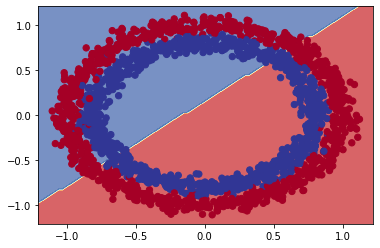

In [9]:
plot_decision_boundary(model_2, X, y)

### Improve The Model

* Add **non-linear** `activation` functions.


### You can checkout [TensorFlow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.98779&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [10]:
# Build
tf.random.set_seed(SEED)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=5, activation="ReLU", 
                          input_shape=[X.shape[-1]], name="input_layer"),
    tf.keras.layers.Dense(units=5, activation="ReLU", name="hidden_layer_1"),
    tf.keras.layers.Dense(units=1, activation="sigmoid", name="output_layer")
])

# Compile
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Summary
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 5)                 15        
                                                                 
 hidden_layer_1 (Dense)      (None, 5)                 30        
                                                                 
 output_layer (Dense)        (None, 1)                 6         
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Fit
history_3 = model_3.fit(X, y, epochs=100)

Epoch 1/100
63/63 [==============================] - 2s 4ms/step - loss: 0.6928 - accuracy: 0.4965
Epoch 2/100
63/63 [==============================] - 0s 4ms/step - loss: 0.6912 - accuracy: 0.5060
Epoch 3/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.5215
Epoch 4/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.5310
Epoch 5/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.5315
Epoch 6/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6862 - accuracy: 0.5395
Epoch 7/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6849 - accuracy: 0.5390
Epoch 8/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.5480
Epoch 9/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.5445
Epoch 10/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.5490
Epoch 11/

In [12]:
# Evaluate
model_3.evaluate(X, y)

63/63 [==============================] - 0s 2ms/step - loss: 0.0999 - accuracy: 0.9675


[0.09992466121912003, 0.9674999713897705]

### Split The Data

* Split it into training and validation sets.

In [13]:
RATIO = 1_600
X_train, y_train = X[:RATIO], y[:RATIO]
X_val, y_val = X[RATIO:], y[RATIO:]

X_train.shape, X_val.shape 

((1600, 2), (400, 2))

In [14]:
# Rebuild model_3
tf.random.set_seed(SEED)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=5, activation="ReLU", 
                          input_shape=[X_train.shape[-1]], name="input_layer"),
    tf.keras.layers.Dense(units=5, activation="ReLU", name="hidden_layer"),
    tf.keras.layers.Dense(units=1, activation="sigmoid", 
                          name="output_layer") # units=1 (since the output is binary)
])

# Compile
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Summary
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 5)                 15        
                                                                 
 hidden_layer (Dense)        (None, 5)                 30        
                                                                 
 output_layer (Dense)        (None, 1)                 6         
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Fit
history_3 = model_3.fit(X_train, y_train, epochs=100)

Epoch 1/100
50/50 [==============================] - 1s 2ms/step - loss: 0.7003 - accuracy: 0.5138
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5056
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6832 - accuracy: 0.5138
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6807 - accuracy: 0.5150
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6793 - accuracy: 0.5175
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6779 - accuracy: 0.5250
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6763 - accuracy: 0.5481
Epoch 8/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5681
Epoch 9/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6726 - accuracy: 0.5506
Epoch 10/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6707 - accuracy: 0.5656
Epoch 11/

In [16]:
# Evaluate
model_3.evaluate(X_val, y_val)

13/13 [==============================] - 0s 2ms/step - loss: 0.1636 - accuracy: 0.9600


[0.16358117759227753, 0.9599999785423279]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


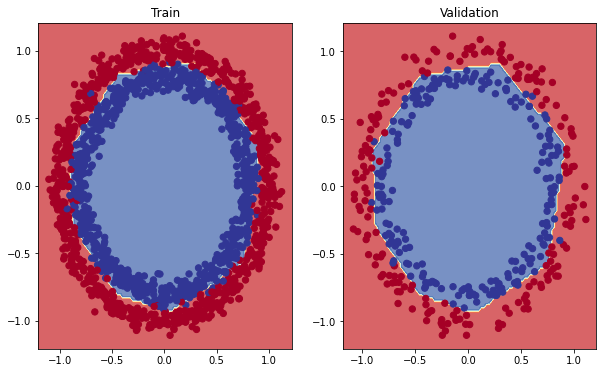

In [17]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plot_decision_boundary(model_3, X_train, y_train)
plt.title("Train")

plt.subplot(1, 2, 2)
plot_decision_boundary(model_3, X_val, y_val)
plt.title("Validation")

plt.show()

### Implement Some Activation Functions

1. Linear function. 

$$linear(x) = x $$

2. Sigmoid function.

$$\sigma(x) = \frac{1}{1 + e^{(-x)}} $$

3. ReLU (Rectified Linear Unit) function.

$$relu(x) = max{(0, x)}$$

4. Tanh function. 

$$tanh(x) = \frac{(e^{x} - e^{-x})}{(e^{x} + e^{-x})} $$

In [18]:
def linear_function(X: np.ndarray) -> np.ndarray:
  """This applies a linear function to the input array.
  i.e it returns an unmodified input."""
  return X


def sigmoid_activation(X: np.ndarray) -> np.ndarray:
  """This applies the sigmoid activation function to the input array.
  It returns values between 0 and 1.
  """
  return np.divide(1, (1 + np.exp(-X)))


def ReLU_activation(X: np.ndarray) -> np.ndarray:
  """This applies the sigmoid activation function to the input array.
  i.e it returns values between 0 and the max. positive number.
  """
  return np.array([max(0, x_) for x_ in X])


def tanh_activation(X: np.ndarray) -> np.ndarray:
  """This applies the tanh activation function to the input array.
  """
  numerator = (np.exp(X) - np.exp(-X))
  denominator = (np.exp(X) + np.exp(-X))
  return np.divide(numerator, denominator)

def linear_plot(X: np.ndarray, title: str="") -> "Plot":
  """This returns the linear plot."""
  plt.plot(X)
  plt.title(f"{title}", size=15)
  plt.show()

In [19]:
A = np.arange(-10, 10)

A

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9])

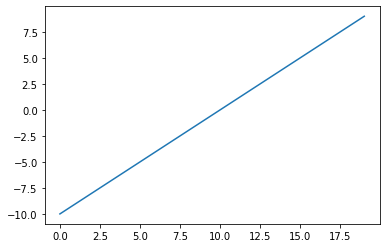

In [20]:
linear_plot(A)

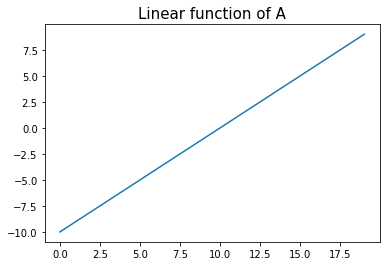

In [21]:
linear_plot(linear_function(A), title="Linear function of A")

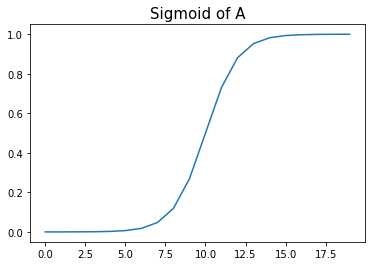

In [22]:
sigmoid_A = sigmoid_activation(A)
linear_plot(sigmoid_A, title="Sigmoid of A")

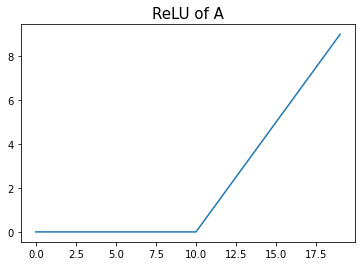

In [23]:
relu_A = ReLU_activation(A)
linear_plot(relu_A, title="ReLU of A")

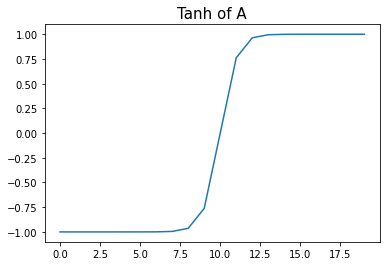

In [24]:
tanh_A = tanh_activation(A)
linear_plot(tanh_A, title="Tanh of A")

### Build Another Model With A Higher Learning Rate

* e.g. learning_rate=0.01

In [25]:
# Build
tf.random.set_seed(SEED)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=5, activation="relu", 
                          input_shape=[X_train.shape[-1]]),
    tf.keras.layers.Dense(units=5, activation="relu"),
    tf.keras.layers.Dense(units=1, activation="sigmoid")
])

# Compile
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# Fit
history_4 = model_4.fit(X_train, y_train, epochs=70)



Epoch 1/70
50/50 [==============================] - 1s 3ms/step - loss: 0.6898 - accuracy: 0.5188
Epoch 2/70
50/50 [==============================] - 0s 2ms/step - loss: 0.6703 - accuracy: 0.5587
Epoch 3/70
50/50 [==============================] - 0s 2ms/step - loss: 0.6586 - accuracy: 0.5975
Epoch 4/70
50/50 [==============================] - 0s 2ms/step - loss: 0.6453 - accuracy: 0.5906
Epoch 5/70
50/50 [==============================] - 0s 2ms/step - loss: 0.6282 - accuracy: 0.6406
Epoch 6/70
50/50 [==============================] - 0s 2ms/step - loss: 0.5997 - accuracy: 0.6725
Epoch 7/70
50/50 [==============================] - 0s 2ms/step - loss: 0.5495 - accuracy: 0.7269
Epoch 8/70
50/50 [==============================] - 0s 2ms/step - loss: 0.4745 - accuracy: 0.7981
Epoch 9/70
50/50 [==============================] - 0s 2ms/step - loss: 0.3974 - accuracy: 0.8400
Epoch 10/70
50/50 [==============================] - 0s 3ms/step - loss: 0.3213 - accuracy: 0.8838
Epoch 11/70
50/50 [

In [26]:
# Evaluate
model_4.evaluate(X_val, y_val)

13/13 [==============================] - 0s 2ms/step - loss: 0.1590 - accuracy: 0.9375


[0.15898026525974274, 0.9375]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


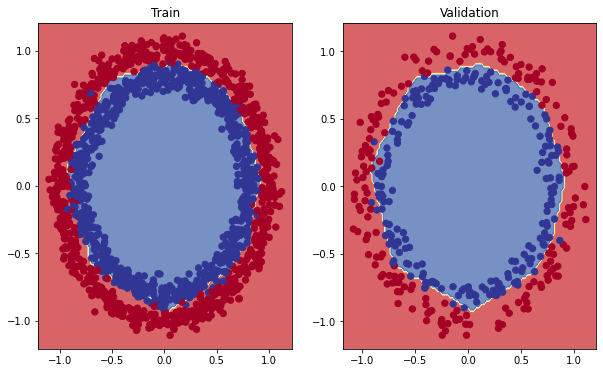

In [27]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plot_decision_boundary(model_4, X_train, y_train)
plt.title("Train")

plt.subplot(1, 2, 2)
plot_decision_boundary(model_4, X_val, y_val)
plt.title("Validation")

plt.show()

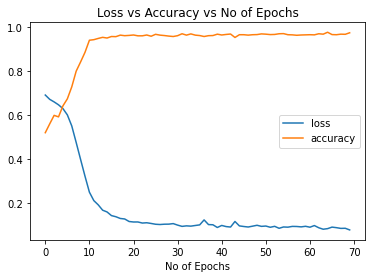

In [28]:
pd.DataFrame(history_4.history).plot()
plt.xlabel("No of Epochs")
plt.title("Loss vs Accuracy vs No of Epochs")
plt.show()

### Finding The Best Learning

* Using `learning rate callback`

In [29]:
from keras.api._v2.keras import callbacks
# Build
tf.random.set_seed(SEED)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation="relu", input_shape=[X_train.shape[-1]]),
    tf.keras.layers.Dense(units=10, activation="relu"),
    tf.keras.layers.Dense(units=1, activation="sigmoid")
])

# Compile
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Use a learning rate callback
lr_scheduler = (
    tf.keras.callbacks
    .LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch/20))
    )

# Fit 
history_5 = model_5.fit(X_train, y_train, epochs=70, callbacks=[lr_scheduler])

Epoch 1/70
50/50 [==============================] - 1s 2ms/step - loss: 0.7105 - accuracy: 0.4931 - lr: 1.0000e-04
Epoch 2/70
50/50 [==============================] - 0s 2ms/step - loss: 0.7090 - accuracy: 0.4931 - lr: 1.1220e-04
Epoch 3/70
50/50 [==============================] - 0s 2ms/step - loss: 0.7075 - accuracy: 0.4931 - lr: 1.2589e-04
Epoch 4/70
50/50 [==============================] - 0s 2ms/step - loss: 0.7060 - accuracy: 0.4931 - lr: 1.4125e-04
Epoch 5/70
50/50 [==============================] - 0s 2ms/step - loss: 0.7045 - accuracy: 0.4931 - lr: 1.5849e-04
Epoch 6/70
50/50 [==============================] - 0s 2ms/step - loss: 0.7031 - accuracy: 0.4931 - lr: 1.7783e-04
Epoch 7/70
50/50 [==============================] - 0s 2ms/step - loss: 0.7016 - accuracy: 0.4913 - lr: 1.9953e-04
Epoch 8/70
50/50 [==============================] - 0s 2ms/step - loss: 0.7003 - accuracy: 0.4363 - lr: 2.2387e-04
Epoch 9/70
50/50 [==============================] - 0s 2ms/step - loss: 0.6991 -

<Figure size 648x504 with 0 Axes>

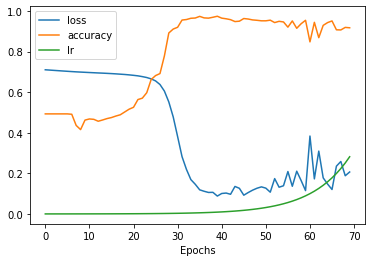

In [30]:
plt.figure(figsize=(9, 7))
pd.DataFrame(history_5.history).plot()
plt.xlabel("Epochs")
plt.show()

In [31]:
epochs = 70
learning_rates = 1e-4 * (10 ** (np.arange(epochs) / 20))
learning_rates

array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.46683592e-02, 5.01187234e-02, 5.62341325e-02,
      

In [32]:
# Slice the list
history_5.history.get("loss")[:4]

[0.7104944586753845,
 0.7089976668357849,
 0.7074833512306213,
 0.7059972286224365]

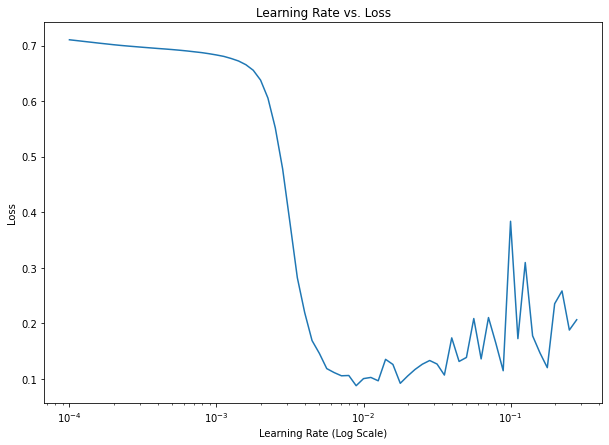

In [33]:
plt.figure(figsize=(10, 7))

# Make a plot with log scaling on the x axis
plt.semilogx(learning_rates, history_5.history.get("loss"))
plt.xlabel("Learning Rate (Log Scale)")
plt.ylabel("Loss")
plt.title("Learning Rate vs. Loss")
plt.show()

In [34]:
# Comment:
# The ideal learning rate from the plot above is the point/region where the 
# loss is decreasing the most. i.e btween 1e-2 and 2e-2 (0.01 and 0.02)

### Rebuild The Model

In [35]:
# Build
tf.random.set_seed(SEED)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=5, activation="relu", 
                          input_shape=[X_train.shape[-1]]),
    tf.keras.layers.Dense(units=5, activation="relu"),
    tf.keras.layers.Dense(units=1, activation="sigmoid")
])

# Compile
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=["accuracy"])

# Fit
history_6 = model_6.fit(X_train, y_train, epochs=50)

Epoch 1/50
50/50 [==============================] - 1s 2ms/step - loss: 0.6689 - accuracy: 0.6244
Epoch 2/50
50/50 [==============================] - 0s 2ms/step - loss: 0.5724 - accuracy: 0.7894
Epoch 3/50
50/50 [==============================] - 0s 2ms/step - loss: 0.3841 - accuracy: 0.9125
Epoch 4/50
50/50 [==============================] - 0s 2ms/step - loss: 0.2406 - accuracy: 0.9438
Epoch 5/50
50/50 [==============================] - 0s 2ms/step - loss: 0.1883 - accuracy: 0.9450
Epoch 6/50
50/50 [==============================] - 0s 2ms/step - loss: 0.1515 - accuracy: 0.9544
Epoch 7/50
50/50 [==============================] - 0s 2ms/step - loss: 0.1446 - accuracy: 0.9419
Epoch 8/50
50/50 [==============================] - 0s 2ms/step - loss: 0.1251 - accuracy: 0.9556
Epoch 9/50
50/50 [==============================] - 0s 2ms/step - loss: 0.1171 - accuracy: 0.9594
Epoch 10/50
50/50 [==============================] - 0s 2ms/step - loss: 0.1091 - accuracy: 0.9638
Epoch 11/50
50/50 [

In [36]:
# Evaluate
loss, accuracy = model_6.evaluate(X_val, y_val)

13/13 [==============================] - 0s 3ms/step - loss: 0.1132 - accuracy: 0.9575


313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


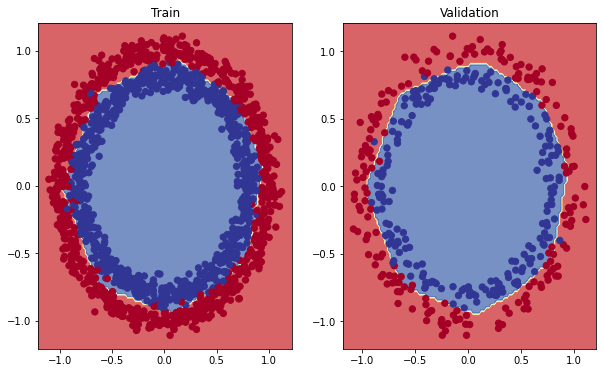

In [37]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plot_decision_boundary(model_6, X_train, y_train)
plt.title("Train")

plt.subplot(1, 2, 2)
plot_decision_boundary(model_6, X_val, y_val)
plt.title("Validation")

plt.show()

### Other Classification Metrics


Source: [Google ML Crash Course](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)

#### Recall (True Positive rate)

$$
Recall = \frac{True Positives}{(True Positives + False Negatives)}
$$

####  False Positive rate

$$
Recall = \frac{False Positives}{(False Positives + True Negatives)}
$$

#### Precision

$$
Precision = \frac{True Positives}{(True Positives + False Positives)}
$$


#### F1 Score

* Harmonic Mean

$$
F1_{score} = \frac{(2 * Precision * Recall)}{(Precision + Recall)}
$$


#### Specificity

$$
Specificity = \frac{True Negatives}{(True Negatives + False Positives)}
$$

#### Accuracy

$$
Accuracy = \frac{(True Positives + True Negatives)}{(True Negatives + False Positives + False Negatives + True Positives)}
$$


In [38]:
# Print the accuracy
print(f"Model Loss on validation data: {loss:.4f}\n")
print(f"Model Accuracy on validation data: {(accuracy * 100):.2f}%")

Model Loss on validation data: 0.1132

Model Accuracy on validation data: 95.75%


### Create Confusion Matrix

In [39]:
from sklearn.metrics import confusion_matrix

y_probs = model_6.predict(X_val)

# It outputs the probability
y_probs[:4]

13/13 [==============================] - 0s 2ms/step


array([[0.99974406],
       [0.00180193],
       [0.99921376],
       [0.8142826 ]], dtype=float32)

In [40]:
# Convert the probabilities to 0 or 1
y_pred = [int(np.round(x) )for x in y_probs]
y_pred[:4]

[1, 0, 1, 1]

In [42]:
def plot_confusion_matrix(*, y_true: np.ndarray, y_pred: np.ndarray, 
                          classes:Union[bool, List[str], None]=None)  -> "Plot":
  """This returns a confusion matrix plot.
  
  Params:
    y_true (np.ndarray): The ground truth. i.e the true values
    y_pred (np.ndarray): t=The predicted values.
    classes (Union[bool, List[str], None], default=None): The class label names.
  """
  PCT, SIZE = 100, 18
  WHITE, BLACK = "white", "black"
  
  # confusion matrix
  c_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred)
  # Normalize the values
  c_matrix_norm = np.divide(c_matrix.astype(float), c_matrix.sum(axis=1))
  n_classes = c_matrix.shape[0]

  fig, ax = plt.subplots(figsize=(10, 10))
  # Display an array as a matrix in a new figure window.
  mat = ax.matshow(c_matrix, cmap=plt.cm.Blues)
  # Add a color bar to the side of the plot
  fig.colorbar(mat)

  labels = classes if classes else np.arange(c_matrix.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix", xlabel="Predicted Label",
         ylabel="True Label", xticks=np.arange(n_classes),
         yticks=np.arange(n_classes), xticklabels=labels, 
         yticklabels=labels)
  
  # Move the label to the bottom
  ax.xaxis.tick_bottom()

  # Adjust the font size
  ax.xaxis.label.set_size(SIZE)
  ax.yaxis.label.set_size(SIZE)
  ax.title.set_size(SIZE)

  # Set the threshold
  threshold = np.mean((c_matrix.max(), c_matrix.min()))

  # Add text
  # itertools.product: Cartesian product of input iterables. 
  # It's equivalent to nested for-loops.
  for i, j in itertools.product(range(c_matrix.shape[0]), 
                                range(c_matrix.shape[1])):
    plt.text(i, j, f"{c_matrix[i, j]} ({c_matrix_norm[i, j] * PCT:.2f}%)",
             horizontalalignment="center", 
             color=WHITE if c_matrix[i, j] > threshold else BLACK, 
             size=SIZE)

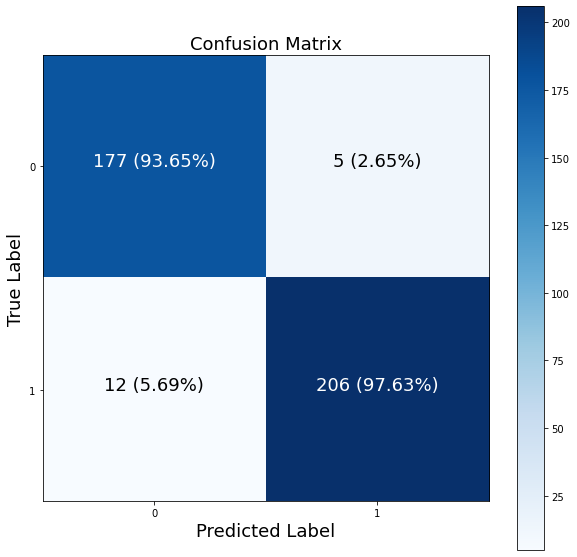

In [43]:
plot_confusion_matrix(y_true=y_val, y_pred=y_pred)